In [84]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, f1_score, precision_score
import pandas as pd


In [85]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
X = data.drop(columns=['price','date']).values
Y = data['price'].copy().values


In [4]:
np.shape(data)

(4600, 18)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in range(12,16):
    X[:,i]=encoder.fit_transform(X[:,i])
scaler = StandardScaler()
scaler = scaler.fit(X)
X[:] = scaler.transform(X)

In [18]:
features=[ 'bedrooms','bathrooms','sqft_living','sqft_lot',
         'floors','waterfront','view','condition','sqft_above','sqft_basement',
         'yr_built','yr_renovated','street','city','statezip','country']
X= pd.DataFrame(data=X, columns=features)
X


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221671,-0.568577,0.861805,1.111825,0.0
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,1.249466,0.778343,0.920595,0.0
2,-0.441122,-0.205201,-0.217367,-0.080977,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,0.019591,-0.640521,-0.609244,0.0
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,1.527871,-1.892459,-1.517585,0.0
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,1.595942,0.444493,-0.370206,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121,0.903755,0.778343,1.111825,0.0
4596,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755,-0.998421,-1.892459,-1.565392,0.0
4597,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693,1.351956,0.527955,-0.083362,0.0
4598,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693,0.942762,0.778343,1.542092,0.0


In [19]:
X = np.asarray(X).astype(np.float32)

In [75]:
from sklearn.model_selection import train_test_split
np.random.seed(15)
X_train, X_test, y_train, y_test = train_test_split(X, Y.reshape(-1,1), test_size=0.2, random_state=13)

In [76]:
n_features = X_train.shape[1]
n_train = X_train.shape[0]
n_test = X_test.shape[0]
n_layer_in = n_features  # input layer
n_layer_h1 = 350          # first  hidden layer
n_layer_h2 = 150          # second hidden layer
#n_layer_h3 = 100          # third hidden layer

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(n_layer_h1, activation="relu", input_shape=(n_features,)))
model.add(Dense(n_layer_h2, activation="relu"))
#model.add(Dense(n_layer_h3, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam', loss='mae', metrics=['mean_absolute_error', 'mse'])

trainlog=model.fit(X_train, y_train, epochs=50, validation_split=0.15)

Epoch 1/50
98/98 [==============================] - 1s 6ms/step - loss: 551360.0625 - mean_absolute_error: 551360.0625 - mse: 687418376192.0000 - val_loss: 536106.7500 - val_mean_absolute_error: 536106.7500 - val_mse: 457058877440.0000
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 550097.1875 - mean_absolute_error: 550097.1875 - mse: 685943226368.0000 - val_loss: 533351.7500 - val_mean_absolute_error: 533351.7500 - val_mse: 453723258880.0000
Epoch 3/50
98/98 [==============================] - 0s 5ms/step - loss: 544631.0625 - mean_absolute_error: 544631.0625 - mse: 679740899328.0000 - val_loss: 524615.6250 - val_mean_absolute_error: 524615.6250 - val_mse: 443330297856.0000
Epoch 4/50
98/98 [==============================] - 0s 5ms/step - loss: 531477.1250 - mean_absolute_error: 531477.1250 - mse: 664857280512.0000 - val_loss: 506541.8125 - val_mean_absolute_error: 506541.8125 - val_mse: 422496534528.0000
Epoch 5/50
98/98 [==============================] - 1s 7

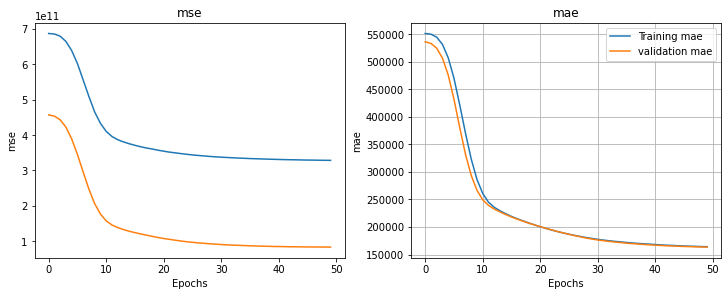

In [78]:
mse_train = trainlog.history['mse']
mse_val = trainlog.history['val_mse']
mae_train = trainlog.history['mean_absolute_error']
mae_val = trainlog.history['val_mean_absolute_error']
epochs=range(50)
f,ax=plt.subplots(1,2,figsize=(10,4),constrained_layout=True)
ax[0].plot(epochs, mse_train, label='Training mse')
ax[0].plot(epochs, mse_val, label='validation mse')
ax[0].set(title='mse',xlabel='Epochs',ylabel='mse')
ax[1].plot(epochs, mae_train, label='Training mae')
ax[1].plot(epochs, mae_val, label='validation mae')
ax[1].set(title='mae',xlabel='Epochs',ylabel='mae')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
y_predict=model.predict(X_test)

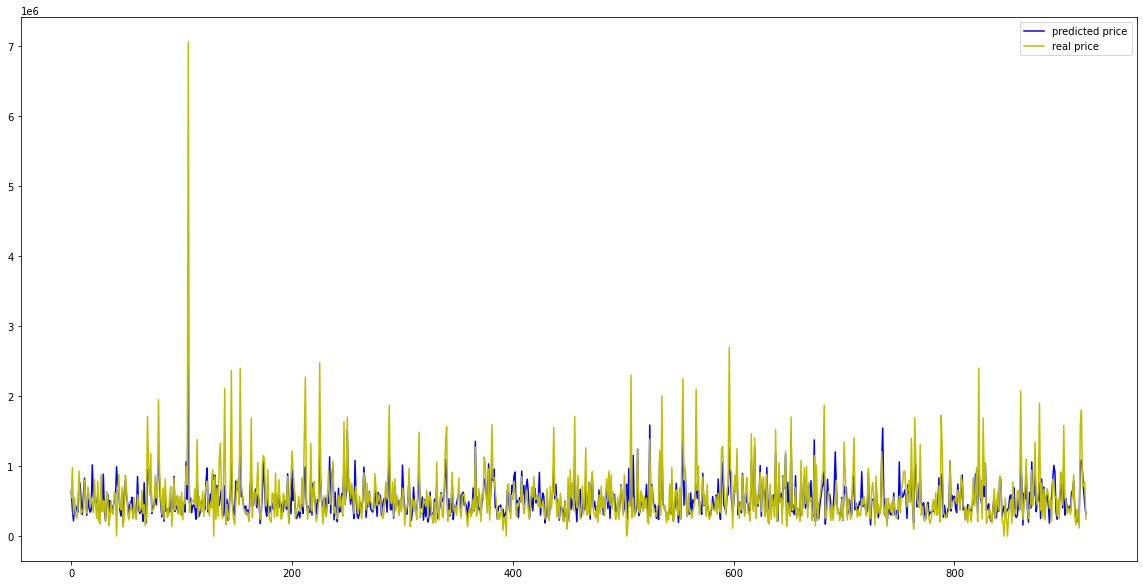

In [80]:
a=range(len(y_predict))
plt.figure(figsize=(20,10))
plt.plot(a,y_predict,'b',label='predicted price')
plt.plot(a,y_test,'y',label='real price')
plt.legend()

In [81]:
y_evddddaluate=model.evaluate(X_test,y_test)

29/29 [==============================] - 0s 2ms/step - loss: 167505.7188 - mean_absolute_error: 167505.7188 - mse: 87060201472.0000
